# US Pollution

### Data downloaded from Kaggle.

"This dataset deals with pollution in the U.S. Pollution in the U.S. has been well documented by the U.S. EPA but it is a pain to download all the data and arrange them in a format that interests data scientists. Hence I gathered four major pollutants (Nitrogen Dioxide, Sulphur Dioxide, Carbon Monoxide and Ozone) for every day from 2000 - 2016 and place them neatly in a csv file."---decription from Kaggle.

### Content:
There is a total of 28 fields:

1. State Code : The code allocated by US EPA to each state
2. County code : The code of counties in a specific state allocated by US EPA
3. Site Num : The site number in a specific county allocated by US EPA
4. Address: Address of the monitoring site
5. State : State of monitoring site
6. County : County of monitoring site
7. City : City of the monitoring site
8. Date Local : Date of monitoring
9. The four pollutants (NO2, O3, SO2 and O3) each has 5 specific columns. For instance, for NO2:


- NO2 Units : The units measured for NO2
- NO2 Mean : The arithmetic mean of concentration of NO2 within a given day
- NO2 AQI : The calculated air quality index of NO2 within a given day
- NO2 1st Max Value : The maximum value obtained for NO2 concentration in a given day
- NO2 1st Max Hour : The hour when the maximum NO2 concentration was recorded in a given day

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
raw_data = pd.read_csv('pollution_us_2000_2016.csv')

In [3]:
raw_data.head(2)

,Unnamed: 0,State Code,County Code,Site Num,Address,State,County,City,Date Local,NO2 Units,...,SO2 Units,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Units,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
0,0,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,3.0,9.0,21,13.0,Parts per million,1.145833,4.2,21,NaN
1,1,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,3.0,9.0,21,13.0,Parts per million,0.878947,2.2,23,25.0


In [3]:
raw_data.shape

(1746661, 29)

## EDA

### 1) Overview:
There are 1746661 rows and 29 columns in the raw data. The data type of each column can be found in the col_types dict.

In [3]:
col_names = raw_data.columns.tolist()
col_types = {col : type(raw_data.loc[1, col]) for col in col_names}
print(col_types)

{'Unnamed: 0': <class 'numpy.int64'>, 'State Code': <class 'numpy.int64'>, 'County Code': <class 'numpy.int64'>, 'Site Num': <class 'numpy.int64'>, 'Address': <class 'str'>, 'State': <class 'str'>, 'County': <class 'str'>, 'City': <class 'str'>, 'Date Local': <class 'str'>, 'NO2 Units': <class 'str'>, 'NO2 Mean': <class 'numpy.float64'>, 'NO2 1st Max Value': <class 'numpy.float64'>, 'NO2 1st Max Hour': <class 'numpy.int64'>, 'NO2 AQI': <class 'numpy.int64'>, 'O3 Units': <class 'str'>, 'O3 Mean': <class 'numpy.float64'>, 'O3 1st Max Value': <class 'numpy.float64'>, 'O3 1st Max Hour': <class 'numpy.int64'>, 'O3 AQI': <class 'numpy.int64'>, 'SO2 Units': <class 'str'>, 'SO2 Mean': <class 'numpy.float64'>, 'SO2 1st Max Value': <class 'numpy.float64'>, 'SO2 1st Max Hour': <class 'numpy.int64'>, 'SO2 AQI': <class 'numpy.float64'>, 'CO Units': <class 'str'>, 'CO Mean': <class 'numpy.float64'>, 'CO 1st Max Value': <class 'numpy.float64'>, 'CO 1st Max Hour': <class 'numpy.int64'>, 'CO AQI': <cla

In [4]:
col_null_count = {col:np.sum(raw_data[col].isnull().astype(int)) for col in col_names}
print(col_null_count)

{'Unnamed: 0': 0, 'State Code': 0, 'County Code': 0, 'Site Num': 0, 'Address': 0, 'State': 0, 'County': 0, 'City': 0, 'Date Local': 0, 'NO2 Units': 0, 'NO2 Mean': 0, 'NO2 1st Max Value': 0, 'NO2 1st Max Hour': 0, 'NO2 AQI': 0, 'O3 Units': 0, 'O3 Mean': 0, 'O3 1st Max Value': 0, 'O3 1st Max Hour': 0, 'O3 AQI': 0, 'SO2 Units': 0, 'SO2 Mean': 0, 'SO2 1st Max Value': 0, 'SO2 1st Max Hour': 0, 'SO2 AQI': 872907, 'CO Units': 0, 'CO Mean': 0, 'CO 1st Max Value': 0, 'CO 1st Max Hour': 0, 'CO AQI': 873323}


#### Among all 29 columns, most columns have values stored in the cells, only 'SO2 AQI' and 'CO AQI' have some data missing.

### 2) Space:
#### It seems that this data set keep track of the pollution in different places (states/ counties/ cities). Now I want to see where are all these places:

In [5]:
unique_states = raw_data['State'].unique()
print('There are', len(unique_states), 'states, and'
      , len(raw_data['State Code'].unique()), 'unique state codes.\n')
print(unique_states)

There are 47 states, and 47 unique state codes.

['Arizona' 'California' 'Colorado' 'District Of Columbia' 'Florida'
 'Illinois' 'Indiana' 'Kansas' 'Kentucky' 'Louisiana' 'Michigan' 'Missouri'
 'New Jersey' 'New York' 'North Carolina' 'Oklahoma' 'Pennsylvania' 'Texas'
 'Virginia' 'Massachusetts' 'Nevada' 'New Hampshire' 'Tennessee'
 'South Carolina' 'Connecticut' 'Iowa' 'Maine' 'Maryland' 'Wisconsin'
 'Country Of Mexico' 'Arkansas' 'Oregon' 'Wyoming' 'North Dakota' 'Idaho'
 'Ohio' 'Georgia' 'Delaware' 'Hawaii' 'Minnesota' 'New Mexico'
 'Rhode Island' 'South Dakota' 'Utah' 'Alabama' 'Washington' 'Alaska']


In [6]:
print('There are', len(raw_data['County'].unique()), 'counties, and'
      , len(raw_data['County Code'].unique()), 'unique county codes.\n')

There are 133 counties, and 73 unique county codes.



In [7]:
same_county = len(raw_data.groupby(['State','County'])['County'].unique()) - len(raw_data['County'].unique())
print("There are {} common county names in two (or multiple) different states.".format(same_county))

There are 6 common county names in two (or multiple) different states.


In [8]:
state_county_map = {state:raw_data[raw_data['State']==state]['County'].unique() for state in unique_states}

In [9]:
print('county number in Cal:', len(state_county_map['California']))
print('city number in Cal:', len(raw_data[raw_data['State']=='California']['City'].unique()))

county number in Cal: 18
city number in Cal: 35


#### <font style="background:#ffff99;">The data cover records from 47 states in US. The county and city information can also be found. Different Counties can have the same County Code in different states. There are also some Counties that are sharing the common name.</font>

Note that there is 'North Carolina', and 'South Carolina', also 'North Dakota' and 'South Dakota', and 'Country of Mexico'.

### 3) Time:
#### What about the time range that this data set covers?

In [25]:
raw_data['Date Local'][0]

'2000-01-01'

In [22]:
raw_data['Date Local'].str.split('-').str[0].unique()

array(['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016'], dtype=object)

In [23]:
raw_data['Date Local'].str.split('-').str[1].unique()

array(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11',
       '12'], dtype=object)

In [24]:
raw_data['Date Local'].str.split('-').str[2].unique()

array(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11',
       '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22',
       '23', '24', '25', '26', '27', '28', '29', '30', '31'], dtype=object)

#### <font style="background:#ffff99;">The data cover records from 2000 to 2016. We can find the data everyday from the same or different monitors.</font>

In [10]:
# Copy the data before I mess with it:
df = raw_data.copy()

## Quick Analysis: National level

### 1) $NO_2$ Analysis:

In [12]:
df['NO2 Units'].unique()

array(['Parts per billion'], dtype=object)

#### Since the unit used for NO2 measurement is in common, we can investigate the average NO2 concentration of each state.

Note that since the number of monitors in each state varies, it makes more sense to analize the average emission instead of simply the summation.

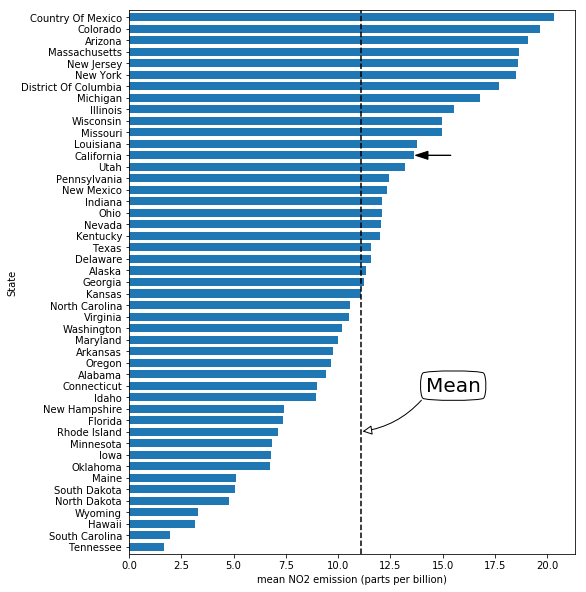

In [11]:
state_no2_mean = df.groupby(['State']).mean()['NO2 Mean'].sort_values()
plt.figure(figsize=(8, 10))
ax = state_no2_mean.plot(kind='barh',width=0.7)
ax.set_xlabel('mean NO2 emission (parts per billion)')
ax.arrow(15.4, 34, -1.1, 0, head_width=0.7, head_length=0.6, fc='k', ec='k')
# ax.arrow(20.5, 43, -1.1, 0, head_width=0.7, head_length=0.6, fc='b', ec='b')
# ax.arrow(12.3, 20, -1.1, 0, head_width=0.7, head_length=0.6, fc='g', ec='g')
# ax.arrow(3.7, 0, -1.1, 0, head_width=0.7, head_length=0.6, fc='r', ec='r')
no2_usavg = np.mean(state_no2_mean)
ax.axvline(x=no2_usavg, c='k', ls='--')
ann = ax.annotate("Mean",xy=(no2_usavg, 10), xycoords='data',xytext=(no2_usavg+0.4*no2_usavg, 14), textcoords='data',
                  size=20, va="center", ha="center",bbox=dict(boxstyle="round4", fc="w"),
                  arrowprops=dict(arrowstyle="-|>",connectionstyle="arc3,rad=-0.2",relpos=(0., 0.),fc="w"))
plt.show()

In [12]:
# Create a new column 'timestamp' that is a Timestamp object of the 'Date Local' data
df['timestamp'] = [pd.Timestamp(df.loc[i, 'Date Local']) for i in range(len(df['Date Local']))]
# Create 'year' column:
df['year'] = df['timestamp'].dt.year

In [13]:
national_yr_pollution_mean = df.loc[:, ['NO2 Mean', 'O3 Mean', 'SO2 Mean', 'CO Mean', 'year']].groupby('year').mean()
national_yr_pollution_max = df.loc[:, ['NO2 1st Max Value', 'O3 1st Max Value', 'SO2 1st Max Value', 'CO 1st Max Value', 'year']].groupby('year').mean()
national_yr_pollution_aqi = df.loc[:, ['NO2 AQI', 'O3 AQI', 'SO2 AQI', 'CO AQI', 'year']].groupby('year').mean()

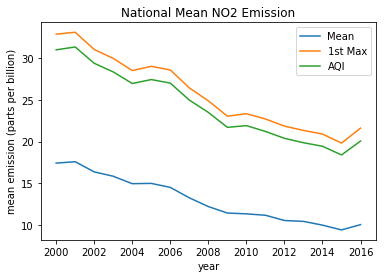

In [14]:
plt.plot(national_yr_pollution_mean.index.tolist(), national_yr_pollution_mean['NO2 Mean'].values, label='Mean')
plt.plot(national_yr_pollution_max.index.tolist(), national_yr_pollution_max['NO2 1st Max Value'].values, label='1st Max')
plt.plot(national_yr_pollution_aqi.index.tolist(), national_yr_pollution_aqi['NO2 AQI'].values, label='AQI')
plt.title('National Mean NO2 Emission')
plt.legend()
plt.xlabel('year')
plt.ylabel('mean emission (parts per billion)')
plt.show()

#### <font style="background:#ffaa80;">Wow, the national mean emission of $NO_2$ decreases over time! That's quite surprising. Is it true? Are there more or few data recorded over time? Maybe in the past we have more data from heavily polluted cities than more recent? What about other types of pollution?</font>

__Quick Note__: $NO_2$ primarily gets in the air from the burning of fuel. NO2 forms from emissions from cars, trucks and buses, power plants, and off-road equipment. ---from US EPA.

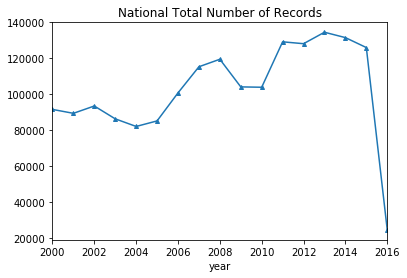

In [15]:
df.loc[:, ['year']].groupby('year').size().plot(marker='^',ms=4)
plt.title('National Total Number of Records')
plt.xlabel('year')
plt.show()

From the above figure, we can see that there are more data from recent years, except there are quite few data recorded in 2016. This is possible that we don't have the full record of 2016. And indeed, from the figure below, we can see the data is ordered in time in this file.

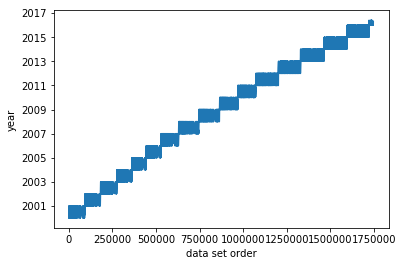

In [16]:
plt.plot(df.index.tolist(), df['timestamp'].values)
plt.xlabel('data set order')
plt.ylabel('year')
plt.show()

### 2) $O_3$ Analysis:

In [12]:
df['O3 Units'].unique()

array(['Parts per million'], dtype=object)

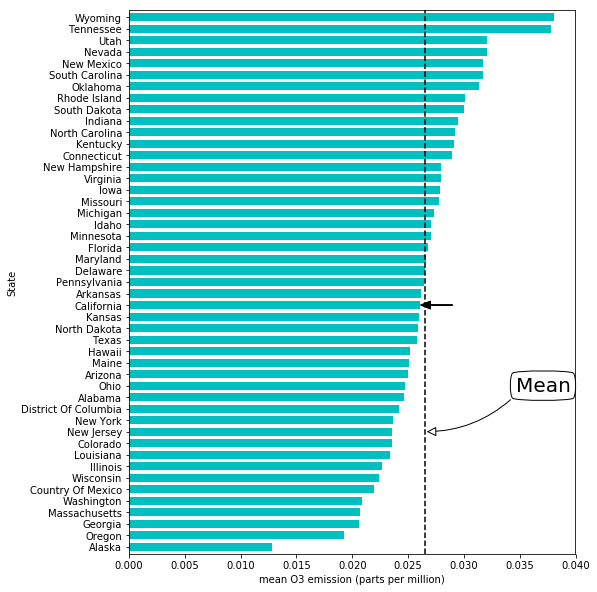

In [17]:
state_o3_mean = df.groupby(['State']).mean()['O3 Mean'].sort_values()
plt.figure(figsize=(8, 10))
ax = state_o3_mean.plot(kind='barh',width=0.7,color='c')
ax.set_xlabel('mean O3 emission (parts per million)')
ax.arrow(0.029, 21, -0.002, 0, head_width=0.7, head_length=0.0009, fc='k', ec='k')
# ax.arrow(0.0277, 15, -0.002, 0, head_width=0.7, head_length=0.0009, fc='b', ec='b')
# ax.arrow(0.0312, 32, -0.002, 0, head_width=0.7, head_length=0.0009, fc='g', ec='g')
# ax.arrow(0.0408, 45, -0.002, 0, head_width=0.7, head_length=0.0009, fc='r', ec='r')
o3_usavg = np.mean(state_o3_mean)
ax.axvline(x=o3_usavg, c='k', ls='--')
ann = ax.annotate("Mean",xy=(o3_usavg, 10), xycoords='data',xytext=(o3_usavg+0.4*o3_usavg, 14), textcoords='data',
                  size=20, va="center", ha="center",bbox=dict(boxstyle="round4", fc="w"),
                  arrowprops=dict(arrowstyle="-|>",connectionstyle="arc3,rad=-0.2",relpos=(0., 0.),fc="w"))
plt.show()

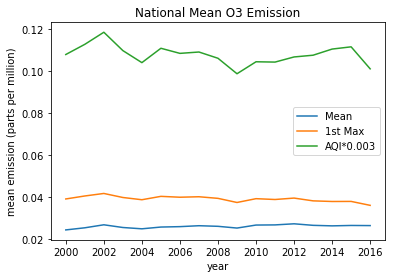

In [18]:
plt.plot(national_yr_pollution_mean.index.tolist(), national_yr_pollution_mean['O3 Mean'].values, label='Mean')
plt.plot(national_yr_pollution_max.index.tolist(), national_yr_pollution_max['O3 1st Max Value'].values, label='1st Max')
plt.plot(national_yr_pollution_aqi.index.tolist(), national_yr_pollution_aqi['O3 AQI'].values*0.003, label='AQI*0.003')
plt.title('National Mean O3 Emission')
plt.legend()
plt.xlabel('year')
plt.ylabel('mean emission (parts per million)')
plt.show()

Different from $NO_2$, the national $O_3$ emission doesn't change over time very much.

__Quick Note__: Bad ozone sources: Tropospheric, or ground level ozone, is not emitted directly into the air, but is created by chemical reactions between oxides of nitrogen (NOx) and volatile organic compounds (VOC). This happens when pollutants emitted by cars, power plants, industrial boilers, refineries, chemical plants, and other sources chemically react in the presence of sunlight. 
Ozone is most likely to reach unhealthy levels on hot sunny days in urban environments, but can still reach high levels during colder months. Ozone can also be transported long distances by wind, so even rural areas can experience high ozone levels. --- from US EPA.

### 3) $SO_2$ Analysis:

In [27]:
df['SO2 Units'].unique()

array(['Parts per billion'], dtype=object)

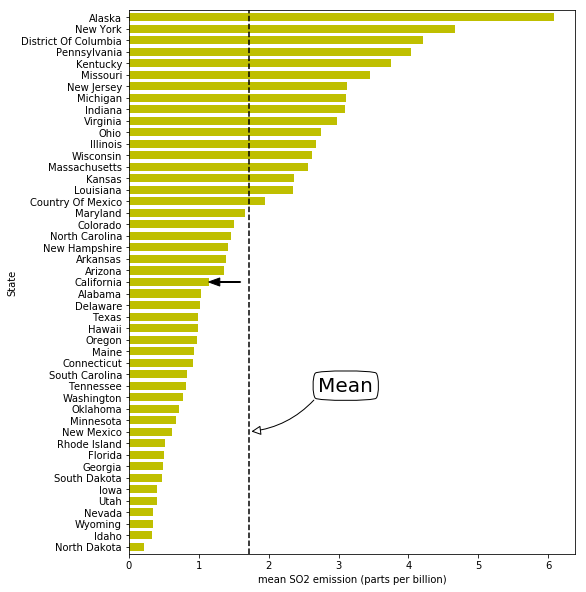

In [19]:
state_so2_mean = df.groupby(['State']).mean()['SO2 Mean'].sort_values()
plt.figure(figsize=(8, 10))
ax = state_so2_mean.plot(kind='barh',width=0.7,color='y')
ax.set_xlabel('mean SO2 emission (parts per billion)')
ax.arrow(1.6, 23, -0.3, 0, head_width=0.7, head_length=0.16, fc='k', ec='k')
# ax.arrow(1.8, 24, -0.3, 0, head_width=0.7, head_length=0.16, fc='b', ec='b')
# ax.arrow(3.5, 37, -0.3, 0, head_width=0.7, head_length=0.16, fc='g', ec='g')
# ax.arrow(1.3, 14, -0.3, 0, head_width=0.7, head_length=0.16, fc='r', ec='r')
so2_usavg = np.mean(state_so2_mean)
ax.axvline(x=so2_usavg, c='k', ls='--')
ann = ax.annotate("Mean",xy=(so2_usavg, 10), xycoords='data',xytext=(so2_usavg+0.8*so2_usavg, 14), textcoords='data',
                  size=20, va="center", ha="center",bbox=dict(boxstyle="round4", fc="w"),
                  arrowprops=dict(arrowstyle="-|>",connectionstyle="arc3,rad=-0.2",relpos=(0., 0.),fc="w"))
plt.show()

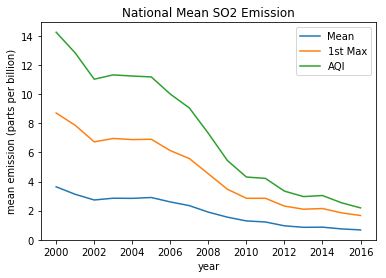

In [20]:
plt.plot(national_yr_pollution_mean.index.tolist(), national_yr_pollution_mean['SO2 Mean'].values, label='Mean')
plt.plot(national_yr_pollution_max.index.tolist(), national_yr_pollution_max['SO2 1st Max Value'].values, label='1st Max')
plt.plot(national_yr_pollution_aqi.index.tolist(), national_yr_pollution_aqi['SO2 AQI'].values, label='AQI')
plt.title('National Mean SO2 Emission')
plt.legend()
plt.xlabel('year')
plt.ylabel('mean emission (parts per billion)')
plt.show()

#### The $SO_2$ density decrease a lot over time!!! Is it really what happening? Might want to double check this in local data!

__Quick Note__: The largest source of SO2 in the atmosphere is the burning of fossil fuels by power plants and other industrial facilities. Smaller sources of SO2 emissions include: industrial processes such as extracting metal from ore; natural sources such as volcanoes; and locomotives, ships and other vehicles and heavy equipment that burn fuel with a high sulfur content. 

### 4) $CO$ Analysis:

In [23]:
df['CO Units'].unique()

array(['Parts per million'], dtype=object)

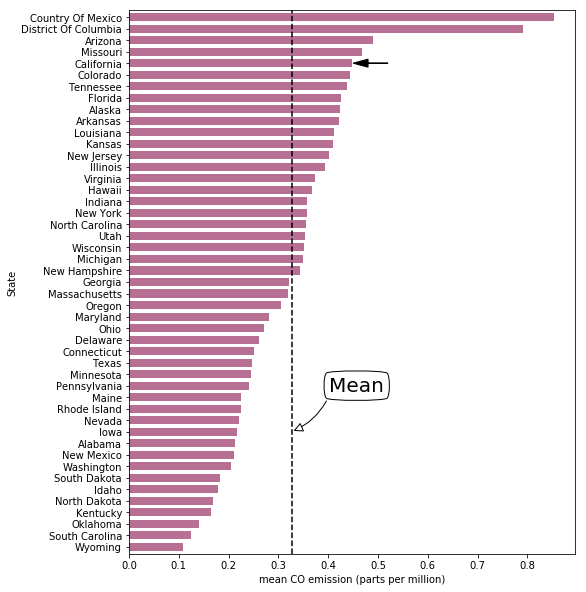

In [21]:
state_co_mean = df.groupby(['State']).mean()['CO Mean'].sort_values()
plt.figure(figsize=(8, 10))
ax = state_co_mean.plot(kind='barh',width=0.7,color=(0.6, 0.2, 0.4, 0.7))
ax.set_xlabel('mean CO emission (parts per million)')
ax.arrow(0.52, 42, -0.04, 0, head_width=0.7, head_length=0.03, fc='k', ec='k')
# ax.arrow(0.56, 44, -0.04, 0, head_width=0.7, head_length=0.03, fc='b', ec='b')
# ax.arrow(0.45, 32, -0.04, 0, head_width=0.7, head_length=0.03, fc='g', ec='g')
# ax.arrow(0.5, 39, -0.04, 0, head_width=0.7, head_length=0.03, fc='r', ec='r')
co_usavg = np.mean(state_co_mean)
ax.axvline(x=co_usavg, c='k', ls='--')
ann = ax.annotate("Mean",xy=(co_usavg, 10), xycoords='data',xytext=(co_usavg+0.4*co_usavg, 14), textcoords='data',
                  size=20, va="center", ha="center",bbox=dict(boxstyle="round4", fc="w"),
                  arrowprops=dict(arrowstyle="-|>",connectionstyle="arc3,rad=-0.2",relpos=(0., 0.),fc="w"))
plt.show()

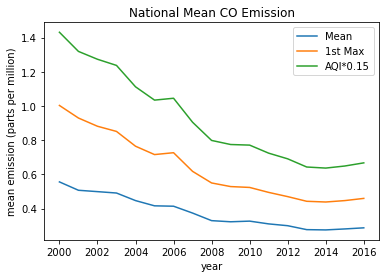

In [22]:
plt.plot(national_yr_pollution_mean.index.tolist(), national_yr_pollution_mean['CO Mean'].values, label='Mean')
plt.plot(national_yr_pollution_max.index.tolist(), national_yr_pollution_max['CO 1st Max Value'].values, label='1st Max')
plt.plot(national_yr_pollution_aqi.index.tolist(), national_yr_pollution_aqi['CO AQI'].values*0.15, label='AQI*0.15')
plt.title('National Mean CO Emission')
plt.legend()
plt.xlabel('year')
plt.ylabel('mean emission (parts per million)')
plt.show()

#### The $CO$ density also decrease by a factor of 2. <font style="background:#ffff99;">According to report from US EPA, this is actually real!!!</font> 
Check out: https://www.epa.gov/air-trends/air-quality-national-summary for detailed information :)

__Quick Note__:The greatest sources of CO to outdoor air are cars, trucks and other vehicles or machinery that burn fossil fuels. A variety of items in your home such as unvented kerosene and gas space heaters, leaking chimneys and furnaces, and gas stoves also release CO and can affect air quality indoors.

#### <font style="background:#ffff99;">Now I want to look into data locally. I pick data from California (marked with black arrow).</font>

## California:

### 1) Overview: Population

The mean density of $NO_2$ and $CO$ is higher than the US average, $O_3$ is around the same as average, and $SO_2$ is lower than the average in California.

In [23]:
# Create a df that only contain data from California:
cal = df[df['State']=='California']
cal = cal.reset_index(drop=True)

In [24]:
print('There are', len(cal['County'].unique()), 'counties,',
      len(cal['City'].unique()), 'cities recorded in California.')

There are 18 counties, 35 cities recorded in California.


In [25]:
cal_round_no2_mean = cal['NO2 Mean'].round().tolist()
cal_round_o3_mean = cal['O3 Mean'].round(3).tolist()
cal_round_so2_mean = cal['SO2 Mean'].round(1).tolist()
cal_round_co_mean = cal['CO Mean'].round(2).tolist()

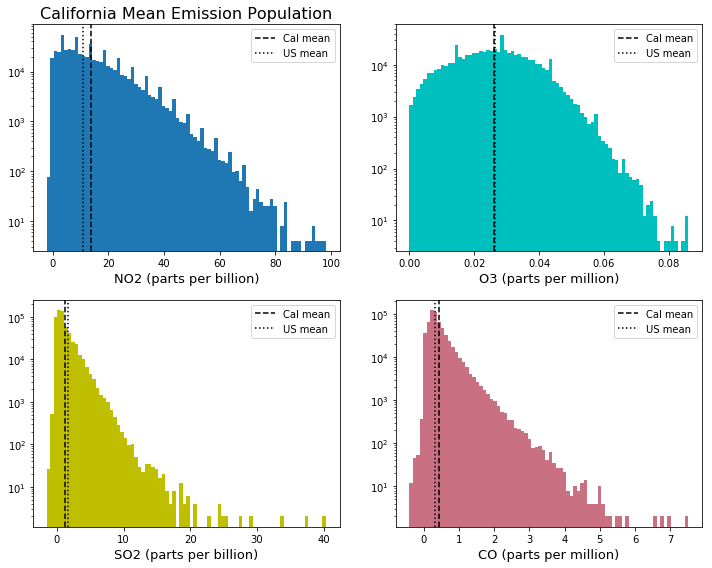

In [26]:
fig = plt.figure(figsize=[10, 8])

ax1 = fig.add_subplot(221)
ax1.set_title('California Mean Emission Population', size=16)
ax1.hist(cal_round_no2_mean, bins=80, log=True)
ax1.axvline(x=np.mean(cal_round_no2_mean), c='k', ls='--', label='Cal mean')
ax1.axvline(x=no2_usavg, c='k', ls=':', label='US mean')
ax1.set_xlabel('NO2 (parts per billion)', size=13)
ax1.legend()

ax2 = fig.add_subplot(222)
ax2.hist(cal_round_o3_mean, bins=80, color='c', log=True)
ax2.axvline(x=np.mean(cal_round_o3_mean), c='k', ls='--',label='Cal mean')
ax2.axvline(x=o3_usavg, c='k', ls=':', label='US mean')
ax2.set_xlabel('O3 (parts per million)', size=13)
ax2.legend()

ax3 = fig.add_subplot(223)
ax3.hist(cal_round_so2_mean, bins=80, color='y', log=True)
ax3.axvline(x=np.mean(cal_round_so2_mean), c='k', ls='--',label='Cal mean')
ax3.axvline(x=so2_usavg, c='k', ls=':', label='US mean')
ax3.set_xlabel('SO2 (parts per billion)', size=13)
ax3.legend()

ax4 = fig.add_subplot(224)
ax4.hist(cal_round_co_mean, bins=80, color=(0.7, 0.2, 0.3, 0.7), log=True)
ax4.axvline(x=np.mean(cal_round_co_mean), c='k', ls='--',label='Cal mean')
ax4.axvline(x=co_usavg, c='k', ls=':', label='US mean')
ax4.set_xlabel('CO (parts per million)', size=13)
ax4.legend()
plt.tight_layout()
plt.show()

The above figures show the histogram of mean density of each pollution recorded by all monitors in California.

Before doing more analysis, I want to also figure out is there any relationship between the mean, max value, and AQI. __We take $NO_2$ as an example.__

### Mean v.s. 1st_Max_Value Relation:

In [27]:
calcity_no2_mean_max_relation = cal.groupby('City').mean().loc[:, ['NO2 Mean', 'NO2 1st Max Value']].sort_values('NO2 Mean')

In [28]:
fit = np.polyfit(calcity_no2_mean_max_relation['NO2 Mean'].tolist(), calcity_no2_mean_max_relation['NO2 1st Max Value'].tolist(), 1)
fit_fn = np.poly1d(fit)

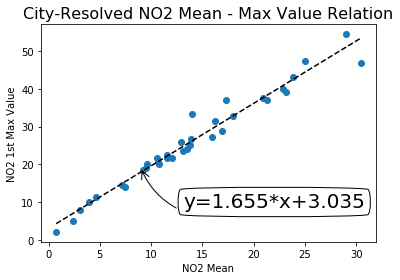

In [29]:
plt.figure()
plt.plot(calcity_no2_mean_max_relation['NO2 Mean'], calcity_no2_mean_max_relation['NO2 1st Max Value'], 'o')
plt.plot(calcity_no2_mean_max_relation['NO2 Mean'], fit_fn(calcity_no2_mean_max_relation['NO2 Mean']), '--k')
plt.xlabel('NO2 Mean')
plt.ylabel('NO2 1st Max Value')
plt.title("City-Resolved NO2 Mean - Max Value Relation", fontsize=16)
ann = plt.annotate("y={}*x+{}".format(fit_fn[1].round(3), fit_fn[0].round(3)),xy=(9, 19), xycoords='data',
                   xytext=(22, 10), textcoords='data',size=20, va="center", ha="center",bbox=dict(boxstyle="round4", fc="w"),
                   arrowprops=dict(arrowstyle="->",connectionstyle="arc3,rad=-0.2",relpos=(0., 0.),fc="w"))
plt.show()

The above figure shows the relation between $NO_2$ mean value and its 1st max value for all the cities in California. We can see they are quite linear. We can calculat the correlation coefficient $r$ as the follow:
$$r(x,y) = \frac{1}{n} \sum_{i=1}^n \frac{(x_i - \bar{x})}{\sigma_x}  * 
\frac{(y_i - \bar{y})}{\sigma_y}$$
where $\sigma_{x,y}$ are the standard deviations.

<font style="background:#ffffcc;">Note that this figure integrates over time, so we don't know whether this relation holds precisely over time. But it is possible that it is quite linear.</font>

In [30]:
x = calcity_no2_mean_max_relation['NO2 Mean'].values
y = calcity_no2_mean_max_relation['NO2 1st Max Value'].values
corr = np.mean((x-np.mean(x))*(y-np.mean(y))/np.std(x)/np.std(y))
print('The correlation coefficient is {}.'.format(corr))

The correlation coefficient is 0.982437343683517.


### AQI v.s. Mean & 1st_Max_Value:

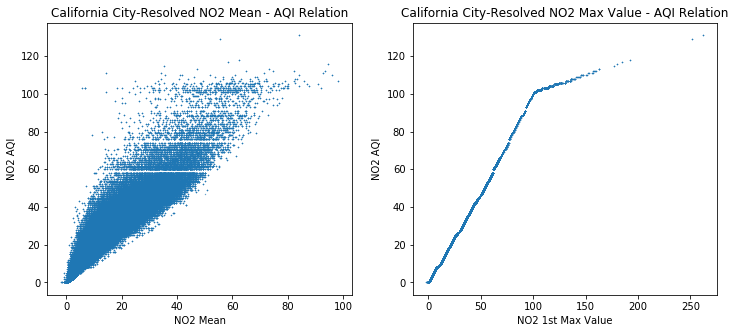

In [31]:
fig = plt.figure(figsize=[12, 5])
ax1 = fig.add_subplot(121)
ax1.plot(cal['NO2 Mean'], cal['NO2 AQI'], 'o', ms=0.3)
ax1.set_title('California City-Resolved NO2 Mean - AQI Relation')
ax1.set_xlabel('NO2 Mean')
ax1.set_ylabel('NO2 AQI')

ax2 = fig.add_subplot(122)
ax2.plot(cal['NO2 1st Max Value'], cal['NO2 AQI'], 'o', ms=0.3)
ax2.set_title('California City-Resolved NO2 Max Value - AQI Relation')
ax2.set_xlabel('NO2 1st Max Value')
ax2.set_ylabel('NO2 AQI')
plt.show()

<font style="background:#ffff99;">Here we can see that the air quality index (AQI) has a perfect linear relationship with 1st_Max_Value. We can also see a kink at 1st_Max_Value = 100 in the right figure. This indicates the way to calculate AQI is actually depends on 1st_Max_Value (the maximum value obtained for concentration in a given day) instead of the mean concentration.</font>

According to the Environmental Protection Agency (https://airnow.gov/index.cfm?action=aqibasics.aqi), the air quality index (AQI) tells you how clean or polluted your air is, and what associated health effects might be a concern for you. The numeric value corresponding to the level of health concern is show as the below:

|AQI Levels of Health Concern|Numerical Value|Meaning|
|---|---|---|
|Good|0 to 50|Air quality is considered satisfactory, and air pollution poses little or no risk.|
|Moderate|51 to 100|Air quality is acceptable; however, for some pollutants there may be a moderate health concern for a very small number of people who are unusually sensitive to air pollution.|
|Unhealthy for Sensitive Groups|101 to 150|Members of sensitive groups may experience health effects. The general public is not likely to be affected.|
|Unhealthy|151 to 200|Everyone may begin to experience health effects; members of sensitive groups may experience more serious health effects.|
|Very Unhealthy|201 to 250|Health alert: everyone may experience more serious health effects.|
|Hazardous|251 to 300|Health warnings of emergency conditions. The entire population is more likely to be affected.|

<font style="background:#ffffcc;">And the kink in the right figure actually makes sense</font> due to the definition of AQI (according to US EPA):

$$I_i=(\frac{I_H-I_L}{B_H-B_L})*(C_p-B_L)+I_L$$

- $B_H$ = Breakpoint concentration greater or equal to given concentration
- $B_L$ = Breakpoint concentration smaller or equal to given concentration
- $I_H$ = AQI value corresponding to $B_H$
- $I_L$ = AQI value corresponding to $B_L$
- $C_p$ = pollutant concentration

#### We can see that $NO_2$ pollution is not serious in general in California.

### 2) Space:

### I want to know which cities contribute more pollution.

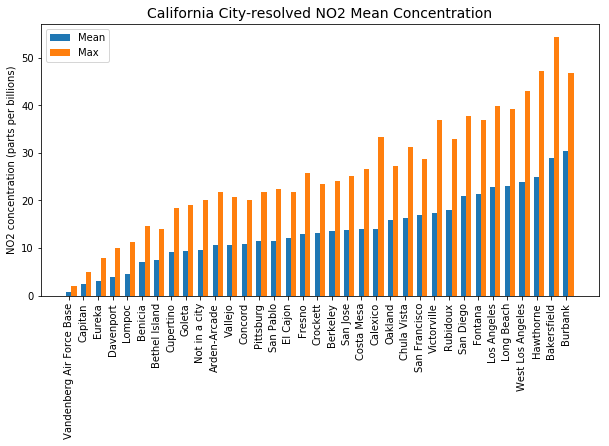

In [32]:
fig = plt.figure(figsize=[10, 5])
ind = np.arange(len(calcity_no2_mean_max_relation['NO2 Mean']))
ax = fig.add_subplot(111)
ax.bar(ind, calcity_no2_mean_max_relation['NO2 Mean'], width=0.35, label='Mean')
ax.bar(ind+0.35, calcity_no2_mean_max_relation['NO2 1st Max Value'], width=0.35, label='Max')
ax.set_xticks(ind)
ax.set_xticklabels(calcity_no2_mean_max_relation.index.tolist(), rotation=90, fontsize=10)
ax.set_ylabel('NO2 concentration (parts per billions)')
ax.set_title('California City-resolved NO2 Mean Concentration', fontsize=14)
plt.legend()
plt.show()

The above figure shows the mean $NO_2$ emission concentration for the recorded cities in California between 2000-2016. We can tell which cities have more $NO_2$ than others in general, but this figure doesn't tell us whether San Diago had higher $NO_2$ concentration than Fontana in 2010, for instance.

### 3) Time:
__We learned that national $NO_2$ pollution is getting better over years, I want to find out whether that is also the case in California.__

In [33]:
cal['timestamp'] = [pd.Timestamp(cal.loc[i, 'Date Local']) for i in range(len(cal['Date Local']))]
cal['year'] = cal['timestamp'].dt.year

In [34]:
cal_yr_pollution_mean = cal.loc[:, ['NO2 Mean', 'O3 Mean', 'SO2 Mean', 'CO Mean', 'year']].groupby('year').mean()
cal_yr_pollution_max = cal.loc[:, ['NO2 1st Max Value', 'O3 1st Max Value', 'SO2 1st Max Value', 'CO 1st Max Value', 'year']].groupby('year').mean()
cal_yr_pollution_aqi = cal.loc[:, ['NO2 AQI', 'O3 AQI', 'SO2 AQI', 'CO AQI', 'year']].groupby('year').mean()

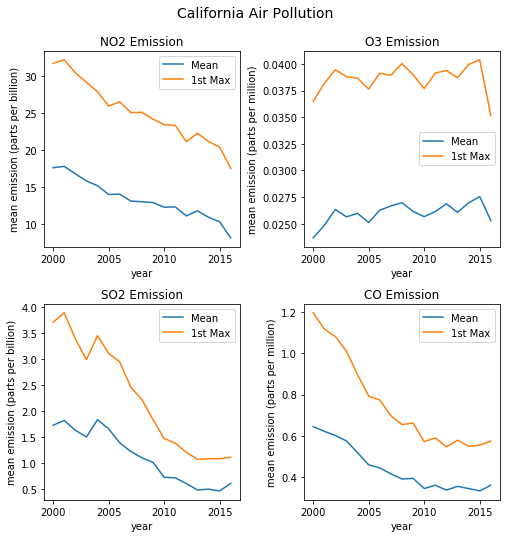

In [46]:
pollutions=['NO2', 'O3', 'SO2', 'CO']
units={'NO2':'billion', 'O3':'million', 'SO2':'billion', 'CO':'million'}
fig = plt.figure(figsize=[8, 8])
fig.suptitle('California Air Pollution', fontsize=14)
for p in range(len(pollutions)):
    ax = fig.add_subplot(int('22'+str(p+1)))
    ax.plot(cal_yr_pollution_mean.index.tolist(), cal_yr_pollution_mean[pollutions[p]+' Mean'].values, label='Mean')
    ax.plot(cal_yr_pollution_max.index.tolist(), cal_yr_pollution_max[pollutions[p]+' 1st Max Value'].values, label='1st Max')
#     ax.plot(cal_yr_pollution_aqi.index.tolist(), cal_yr_pollution_aqi[pollutions[p]+' AQI'].values, label='AQI')
    ax.set_title('{} Emission'.format(pollutions[p]))
    ax.set_xlabel('year')
    ax.set_ylabel('mean emission (parts per {})'.format(units[pollutions[p]]))
    ax.legend()
plt.tight_layout(pad=4, w_pad=0.5, h_pad=1.0)
plt.show()

__Now I want to select a few cities and see the pollutant concentration in these cities over time. But before doing that, I want to make sure the selected cities have relatively complete records.__ 

In [73]:
city_yr = cal.loc[:, ['City', 'NO2 Mean', 'year']].groupby(['City', 'year']).mean().reset_index()
cal_cities = city_yr['City'].unique()
city_yr_dict = {city:city_yr[city_yr['City']==city]['year'].values for city in cal_cities}

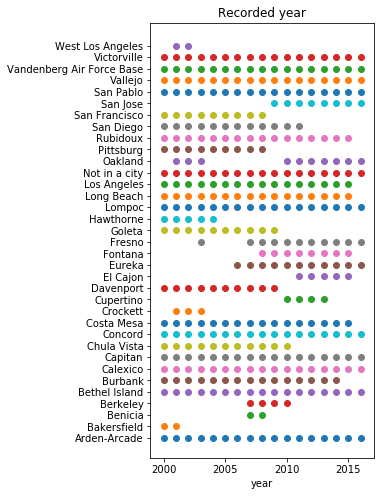

In [93]:
plt.figure(figsize=[4, 8])
ax = plt.subplot()
for c in range(len(cal_cities)):
    x = city_yr_dict[cal_cities[c]]
    y = np.ones(len(x))*c
    ax.scatter(x, y)
ax.set_yticks(np.arange(len(cal_cities)))
ax.set_yticklabels(cal_cities.tolist(), fontsize=10)
ax.set_title('Recorded year')
ax.set_xlabel('year')
plt.show()

We can see from this figure that the data are recorded in some cities in some years, but not for the others. I pick Victorville, Lompoc, Concord, Los Angeles for further analysis. 

In [95]:
four_cities = ['Victorville', 'Lompoc', 'Concord', 'Los Angeles']
four_cities_yr = [cal[cal['City']==city].groupby('year').mean().reset_index() for city in four_cities]

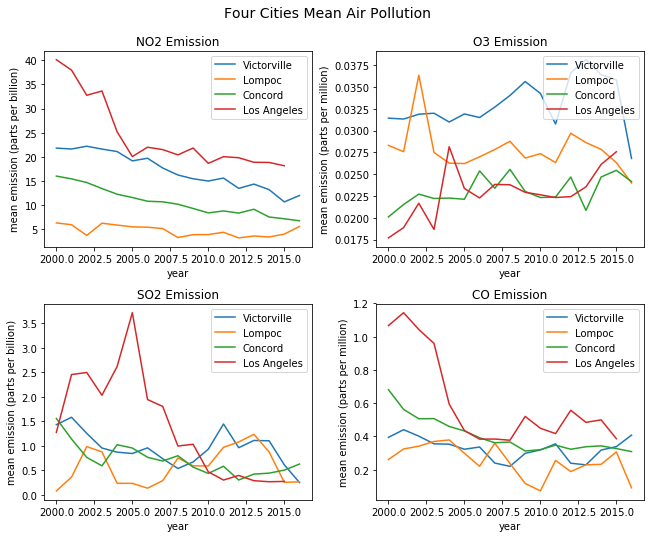

In [96]:
fig = plt.figure(figsize=[10, 8])
fig.suptitle('Four Cities Mean Air Pollution', fontsize=14)
for p in range(len(pollutions)):
    ax = fig.add_subplot(int('22'+str(p+1)))
    for c in range(4): 
        ax.plot(four_cities_yr[c]['year'].values.tolist(), four_cities_yr[c][pollutions[p]+' Mean'].values, label=four_cities[c])
    ax.set_title('{} Emission'.format(pollutions[p]))
    ax.set_xlabel('year')
    ax.set_ylabel('mean emission (parts per {})'.format(units[pollutions[p]]))
    ax.legend()
plt.tight_layout(pad=4, w_pad=0.5, h_pad=1.0)
plt.show()

<font style="background:#ffffcc;">The trend of pollutant concentration in these four cities generally match with the trend for the whole California state. Though we need to be careful when we comparing the air condition in two cities since they might carrying data from different time.</font>

### Now, I want to move on and see the pollutant concentration as a function of daytime. 
Concretely, I want to know at when do we have highest concentration of each pollutant in a day. We can make use of the 1st_Max_Hour columns.

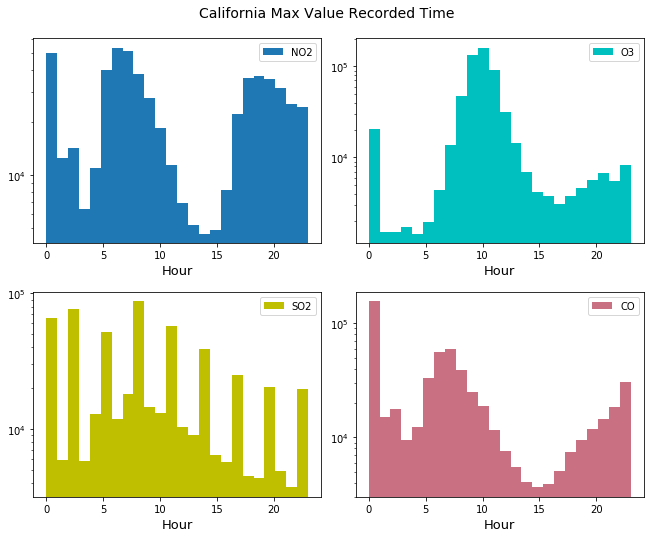

In [101]:
fig = plt.figure(figsize=[10, 8])
max_hour=['NO2 1st Max Hour', 'O3 1st Max Hour', 'SO2 1st Max Hour', 'CO 1st Max Hour']
colors = [None, 'c','y',(0.7, 0.2, 0.3, 0.7)]
fig.suptitle('California Max Value Recorded Time', fontsize=14)
for i in range(len(max_hour)):
    ax = fig.add_subplot(220 + i + 1)
    ax.hist(cal[max_hour[i]], bins=24, color=colors[i],log=True, label=max_hour[i].split()[0])
    ax.set_xlabel('Hour', size=13)
    ax.legend()

plt.tight_layout(pad=4, w_pad=0.5, h_pad=1.0)
plt.show()

The above figure show when was the maximal concentration measured in each recorded day for all cities in California. 
- $NO_2$: <font style="background:#ffffcc;">Main mode at ~8am, another big hump emerges starting at 5am.</font> This is a reasonable distribution given that the main source of $NO_2$ is burning of fuel, like from cars, trucks, power plants... And <font style="background:#ffffcc;">the two modes happens at the time when people commute a lot.</font>

- $O_3$: The distribution of $O_3$ is very similar to that of $NO_2$. However, __the main mode and the hump happen a little bit later than the former.__ My personal theory is that <font style="background:#ffffcc;">these $O_3$ is still mainly due to human's behavior. But, since $O_3$ is created by chemical reactions between oxides of nitrogen (NOx) and volatile organic compounds, its concentration will rise after these compounds rise. This could be the reason why the two mode happen later than those of $NO_2$. Moreover because hot sunny day will help the reactions, this might explain the main mode happens around noon, and reach much higher value than the second mode in the evening.</font>

- $SO_2$: The distribution of $SO_2$ is very interesting. First of all, it has a smooth bump as a background. On top of that there are many sharp peaks happen nearly every 3 hours even in the middle of the night. We know that $SO_2$ mainly comes from burning of fossil fuels by power plants and other industrial facilities and processes. I personally think that it probably tells us these activities keep going 24 hour a day (you just don't shut down the whole facility at all until it need maintenance). But does that mean all power plants emit $SO_2$ at the same time everyday?

- $CO$: Similar distribution as that of $NO_2$. Human activities (commute) explain. Although it is intriguing that in the late night the concentration is quite high.

## Summary:

1. This data set include the concentration of four pollutants in 47 states from 2000-2016. Although we cannot track the concentration of all monitors between 2000-2016, we can see that the measured air pollution is getting better the past 20 years in US.
2. I learned that the AQI depends on the maximal measured concentration, and that makes sense.
3. We investigate which states have worse air pollution than others.
4. We look into data from California. We identify which cities emit more pollutants than others.
5. We check if the measured pollutant as a function of time in California match the national trend. And we find that California follows the same trend.
6. We also investigate the daily distribution of when the maximal concentration is recorded. Some features of distribution can be explained by human activities, others need more careful study.